# Separating connected components

The purpose of this notebook is to show how to pre-process neighborhood data so only "connected" data points appear in a given neighborhood. The notion of connected here between $x$ and $y$ is that within the given neighborhood $R$ of the data, there exists a path between $x$ and $y$ such that the lenghts of the edges are all less than epsilon. This condition can be changed: e.g. using diffusion maps, on a selected neighborhood, a bandwidth $epsilon$ can be chosen and the diffusion distance between pairs of points can be computed. 

In [438]:
import sys
sys.version

'2.7.12 |Anaconda 2.4.1 (x86_64)| (default, Jun 29 2016, 11:09:23) \n[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]'

In [439]:
sys.path.append("/Users/gil/Documents/repos/cpp/vp_trees_cpp/vp_trees_cpp")
import vp_tree

In [440]:
import numpy as np
import random

In [441]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [442]:
def make_data_roll(H = 50., N = 5000, noise = 1e-1):
    '''
    Data points on k dimensional sphere (S^k) in dim dimensional ambient space.
    N points, contaminated by Gaussian iid noise with sigma = 0.1.
    '''
    dim = 3
    t = sorted([random.uniform(3.*np.pi/2., 9.*np.pi/2) for i in range(N)])
    h = [random.uniform(0,H) for i in range(N)]
    xs,ys,zs = list(t * np.cos(t)), list(h) , list(t * np.sin(t))
    data_corruption = np.asarray(make_gaussian_data(0.,noise,N,dim))
    return np.asarray(zip(xs,ys,zs)) + data_corruption

In [461]:
import vp_tree
def get_epsilon_connected_neighborhood(x, data, epsilon, max_iter = 1000):
    '''
    Find all points in data q such that there exists 
    a path p-q_1-q_2-...-q_n-q where consecutive distances
    are at most epsilon.
    
    Args:
        x (list):
            The point about which to find the connected neighborhood.
        data (list):
            list of data points, each point is a list of floats. Should include x.
        epsilon (float):
            maximum length between points along a path of a connected component.
        max_iter (optional, int):
            when to stop looking for new points, to avoid running for too long.
    '''    
    looking_S = set([tuple(x)]) ## x should be in old_S as well.
    old_S = set([tuple(el) for el in data])
    output_S = set()
    
    T = vp_tree.tree_container(data) ## more efficient way, i.e. remove elements?
    
    count = 0 
    while not len(looking_S) == 0 and count < max_iter:
        count += 1 
        output_S.update(looking_S)
        add_next = set()
        for q in looking_S:
            new_points = T.find_within_epsilon(list(q),epsilon)
            add_next.update([tuple(el) for el in new_points])
            old_S.remove(tuple(q))
            output_S.update(looking_S)
        looking_S = add_next.difference(output_S)    
    return output_S

# List

In [444]:
data_1 = [[float(i)] for i in range(1000)]

In [465]:
output = get_epsilon_connected_neighborhood([5.,],data_1,0.9)

In [466]:
len(output)

1

In [467]:
output = get_epsilon_connected_neighborhood([5.,],data_1,1.1)

In [468]:
len(output)

1000

# Roll

In [446]:
epsilon = 2.5

In [447]:
data_roll = make_data_roll().tolist()

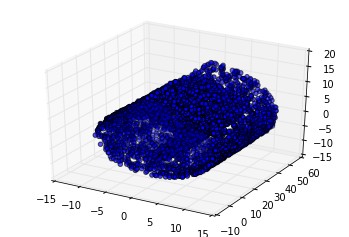

In [460]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*np.asarray(data_roll).T)

In [448]:
## running get_epsilon_connected_neighborhood on the ENTIRE roll. 
roll_neigborhood = get_epsilon_connected_neighborhood(data_roll[0], data_roll, epsilon, max_iter = 1000)

In [449]:
len(roll_neigborhood)

5000

In [450]:
%timeit get_epsilon_connected_neighborhood(data_roll[0], data_roll, epsilon, max_iter = 1000)

1 loops, best of 3: 375 ms per loop


### Neighborhood in roll

### running get_epsilon_connected_neighborhood on a small neighborhood of a roll.

In [451]:
R = 12
epsilon = 2.5

In [452]:
selected_point = data_roll[0]

In [453]:
T = vp_tree.tree_container(data_roll) 

In [454]:
N = T.find_within_epsilon(selected_point,R)

In [455]:
len(N)

1071

In [456]:
N_epsilon = list(get_epsilon_connected_neighborhood(selected_point, N, epsilon, max_iter = 1000))

In [457]:
len(N_epsilon)

511

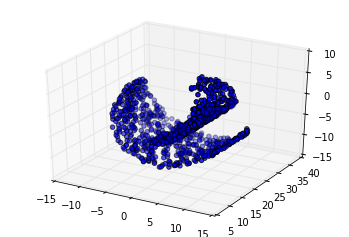

In [458]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*np.asarray(N).T)

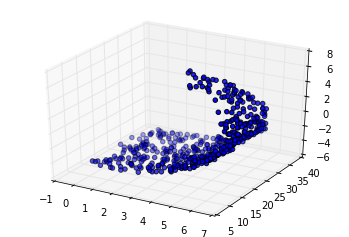

In [459]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*np.asarray(N_epsilon).T)